In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, MinMaxScaler,StandardScaler

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Project Data/Repo Data.csv')
data=data[::-1]
data = data.reset_index(drop=True)

rate=pd.read_csv('/content/drive/MyDrive/Project Data/DFF (1) - DFF (1).csv')

In [ ]:
rate.head()

,observation_date,DFF
0,2018-1-1,1.33
1,2018-2-1,1.42
2,2018-3-1,1.42
3,2018-4-1,1.42
4,2018-5-1,1.42


In [ ]:
data.head(5)

,Date,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,4/2/2018,1.80,849,1.950,3.823,324.262,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4/3/2018,1.83,825,1.930,8.695,299.702,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,4/4/2018,1.74,859,1.795,4.570,300.604,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4/5/2018,1.75,829,1.830,4.645,292.669,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4/6/2018,1.75,845,1.819,4.895,291.637,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data=data.dropna(axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1872 non-null   object 
 1   SOFR Fix     1872 non-null   float64
 2   SOFR Volume  1872 non-null   object 
 3   DTCC Tsy     1872 non-null   float64
 4   RRP Amt      1872 non-null   float64
 5   TGA Balance  1872 non-null   float64
dtypes: float64(4), object(2)
memory usage: 87.9+ KB


In [ ]:
data.shape

(1872, 6)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='mixed', dayfirst=True, errors='coerce')
data['SOFR Volume']=pd.to_numeric(data['SOFR Volume'],errors='coerce')

rate['observation_date'] = pd.to_datetime(rate['observation_date'], format='mixed', dayfirst=True, errors='coerce')


In [ ]:
rate.head()

,observation_date,DFF
0,2018-01-01,1.33
1,2018-02-01,1.42
2,2018-03-01,1.42
3,2018-04-01,1.42
4,2018-05-01,1.42


In [ ]:
data.isnull().sum()

,0
Date,0
SOFR Fix,0
SOFR Volume,14
DTCC Tsy,0
RRP Amt,0
TGA Balance,0


In [ ]:
data['SOFR Volume'] = data['SOFR Volume'].fillna(data['SOFR Volume'].mean())

In [ ]:
data.head(20)

,Date,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance
0,2018-02-04,1.80,849.0,1.950,3.823,324.262
1,2018-03-04,1.83,825.0,1.930,8.695,299.702
2,2018-04-04,1.74,859.0,1.795,4.570,300.604
3,2018-05-04,1.75,829.0,1.830,4.645,292.669
4,2018-06-04,1.75,845.0,1.819,4.895,291.637
5,2018-09-04,1.75,833.0,1.834,4.070,301.022
6,2018-10-04,1.75,811.0,1.825,3.990,302.176
7,2018-11-04,1.76,811.0,1.823,2.361,287.804
8,2018-12-04,1.73,871.0,1.786,4.120,225.320
9,2018-04-13,1.72,776.0,1.796,3.471,245.560


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
rate['observation_date'] = pd.to_datetime(rate['observation_date'])

# Merge by matching dates (left join keeps all rows from 'data')
merged_df = data.merge(
    rate[['observation_date', 'DFF']],
    left_on='Date',
    right_on='observation_date',
    how='left'
)

# Drop redundant 'observation_date' column
merged_df = merged_df.drop(columns=['observation_date'])

In [ ]:
merged_df.head()

,Date,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,DFF
0,2018-02-04,1.80,849.0,1.950,3.823,324.262,1.68
1,2018-03-04,1.83,825.0,1.930,8.695,299.702,1.69
2,2018-04-04,1.74,859.0,1.795,4.570,300.604,1.69
3,2018-05-04,1.75,829.0,1.830,4.645,292.669,1.69
4,2018-06-04,1.75,845.0,1.819,4.895,291.637,1.69


In [ ]:
import pandas as pd

# Ensure both date columns are datetime type
data['Date'] = pd.to_datetime(data['Date'])
rate['observation_date'] = pd.to_datetime(rate['observation_date'])

# Merge by matching dates (left join keeps all rows from 'data')
merged_df = data.merge(
    rate[['observation_date', 'DFF']],
    left_on='Date',
    right_on='observation_date',
    how='left'
)

# Drop redundant 'observation_date' column
df = merged_df.drop(columns=['observation_date'])


In [ ]:
df.head()

,Date,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,DFF
0,2018-02-04,1.80,849.0,1.950,3.823,324.262,1.68
1,2018-03-04,1.83,825.0,1.930,8.695,299.702,1.69
2,2018-04-04,1.74,859.0,1.795,4.570,300.604,1.69
3,2018-05-04,1.75,829.0,1.830,4.645,292.669,1.69
4,2018-06-04,1.75,845.0,1.819,4.895,291.637,1.69


In [ ]:
# data['Date'] = range(1, len(data) + 1)
# df['SOFR_lag1'] = df['SOFR Fix'].shift(1)
# df['SOFR_lag2'] = df['SOFR Fix'].shift(2)
# df['SOFR_lag3'] = df['SOFR Fix'].shift(3)
# df['SOFR_lag4'] = df['SOFR Fix'].shift(4)
# df['SOFR_lag5'] = df['SOFR Fix'].shift(5)

In [ ]:


df.isnull().sum()

,0
Date,0
SOFR Fix,0
SOFR Volume,0
DTCC Tsy,0
RRP Amt,0
TGA Balance,0
DFF,0


In [ ]:
df.head(10)

,Date,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,DFF
0,2018-02-04,1.80,849.0,1.950,3.823,324.262,1.68
1,2018-03-04,1.83,825.0,1.930,8.695,299.702,1.69
2,2018-04-04,1.74,859.0,1.795,4.570,300.604,1.69
3,2018-05-04,1.75,829.0,1.830,4.645,292.669,1.69
4,2018-06-04,1.75,845.0,1.819,4.895,291.637,1.69
5,2018-09-04,1.75,833.0,1.834,4.070,301.022,1.69
6,2018-10-04,1.75,811.0,1.825,3.990,302.176,1.69
7,2018-11-04,1.76,811.0,1.823,2.361,287.804,1.69
8,2018-12-04,1.73,871.0,1.786,4.120,225.320,1.69
9,2018-04-13,1.72,776.0,1.796,3.471,245.560,1.69


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%d/%m', errors='coerce')

# 2) Extract day, year, month
df['day'] = df['Date'].dt.day
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

# 3) Month cyclical encoding
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# 4) Day of week (dow) cyclical encoding
df['dow'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['dow_sin'] = np.sin(2 * np.pi * df['dow'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['dow'] / 7)

# 5) Week of year (1-52 or 53)
df['weekofyear'] = df['Date'].dt.isocalendar().week

# 6) Quarter (1-4)
df['quarter'] = df['Date'].dt.quarter

# 7) Month-end, quarter-end, year-end flags
df['month_end_flag'] = df['Date'].dt.is_month_end.astype(int)
df['quarter_end_flag'] = df['Date'].dt.is_quarter_end.astype(int)
df['year_end_flag'] = df['Date'].dt.is_year_end.astype(int)

# 8) Drop original Date column
df = df.drop(columns=['Date'])



In [ ]:
df.tail(10)

,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,DFF,day,year,month,month_sin,month_cos,dow,dow_sin,dow_cos,weekofyear,quarter,month_end_flag,quarter_end_flag,year_end_flag
1862,4.28,2663.0,4.326,181.417,260.807,4.33,6,2025,12,-2.449294e-16,1.0,5,-0.974928,-0.222521,49,4,0,0,0
1863,4.28,2644.0,4.340,168.645,288.078,4.33,13,2025,6,1.224647e-16,-1.0,4,-0.433884,-0.900969,24,2,0,0,0
1864,4.32,2697.0,4.380,140.759,446.302,4.33,16,2025,6,1.224647e-16,-1.0,0,0.000000,1.000000,25,2,0,0,0
1865,4.31,2692.0,4.360,168.939,409.139,4.33,17,2025,6,1.224647e-16,-1.0,1,0.781831,0.623490,25,2,0,0,0
1866,4.28,2639.0,4.329,205.050,383.851,4.33,18,2025,6,1.224647e-16,-1.0,2,0.974928,-0.222521,25,2,0,0,0
1867,4.29,2700.0,4.331,138.283,366.520,4.33,20,2025,6,1.224647e-16,-1.0,4,-0.433884,-0.900969,25,2,0,0,0
1868,4.29,2740.0,4.343,165.319,374.568,4.33,23,2025,6,1.224647e-16,-1.0,0,0.000000,1.000000,26,2,0,0,0
1869,4.30,2733.0,4.361,187.367,358.071,4.33,24,2025,6,1.224647e-16,-1.0,1,0.781831,0.623490,26,2,0,0,0
1870,4.36,2772.0,4.408,210.879,334.579,4.33,25,2025,6,1.224647e-16,-1.0,2,0.974928,-0.222521,26,2,0,0,0
1871,4.40,2802.0,4.412,252.400,304.841,4.33,26,2025,6,1.224647e-16,-1.0,3,0.433884,-0.900969,26,2,0,0,0


/tmp/ipython-input-266-1061452019.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SOFR Fix'])


0.16278769064613405


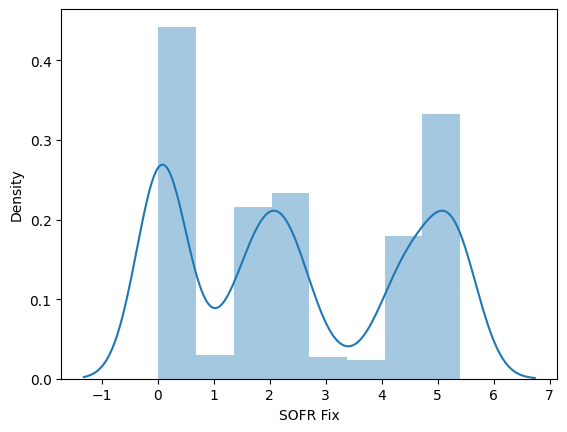

In [ ]:
sns.distplot(df['SOFR Fix'])
print(df['SOFR Fix'].skew())

/tmp/ipython-input-267-1952875412.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SOFR Volume'])


1.384455624442873


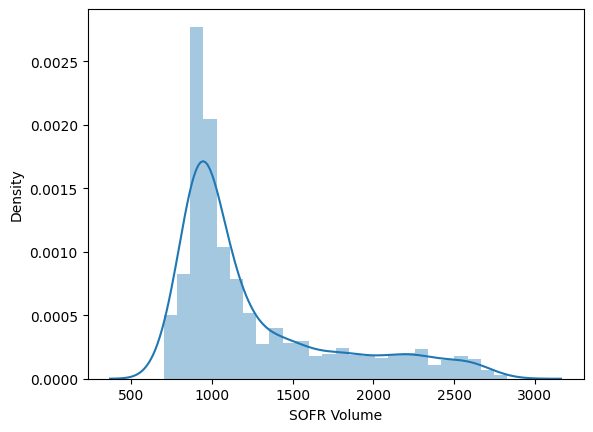

In [ ]:
sns.distplot(df['SOFR Volume'])
print(df['SOFR Volume'].skew())

/tmp/ipython-input-268-626132318.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DTCC Tsy'])


0.1522296034898897


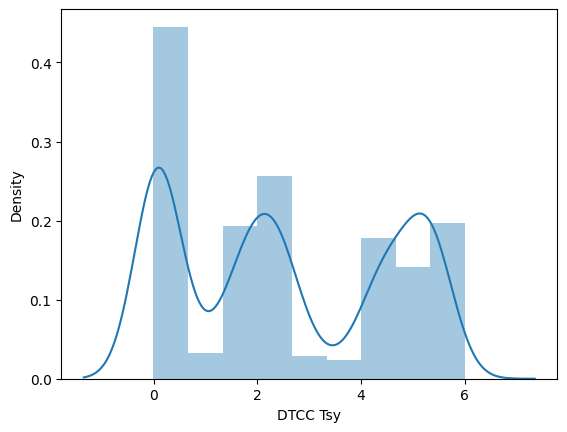

In [ ]:
sns.distplot(df['DTCC Tsy'])
print(df['DTCC Tsy'].skew())

/tmp/ipython-input-269-84510397.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RRP Amt'])


0.8254452272513909


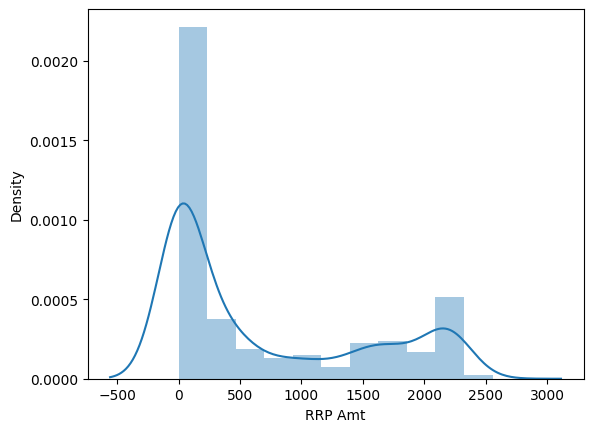

In [ ]:
sns.distplot(df['RRP Amt'])
print(df['RRP Amt'].skew())

/tmp/ipython-input-270-1637397520.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TGA Balance'])


1.2094588465425922


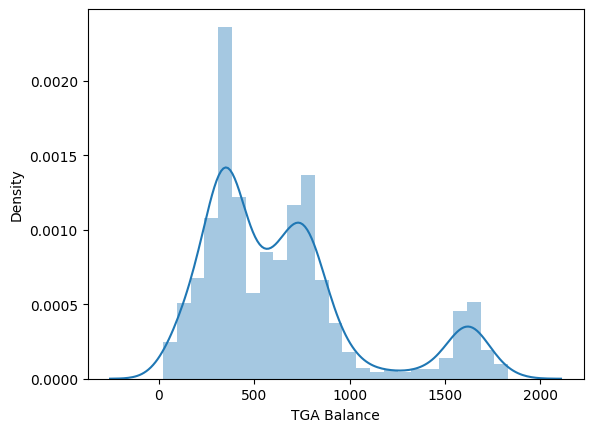

In [ ]:
sns.distplot(df['TGA Balance'])
print(df['TGA Balance'].skew())

In [ ]:
n_total = len(df)
n_train = int(0.8 * n_total)
n_val = int(0.1 * n_total)
n_test = n_total - n_train - n_val  # ensures it sums to total

train_end_idx = n_train - 1
val_end_idx = n_train + n_val - 1

df_train = df.iloc[:train_end_idx + 1]
df_val = df.iloc[train_end_idx + 1:val_end_idx + 1]
df_test = df.iloc[val_end_idx + 1:]

In [ ]:
df_test.head()

,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,DFF,day,year,month,month_sin,month_cos,dow,dow_sin,dow_cos,weekofyear,quarter,month_end_flag,quarter_end_flag,year_end_flag
1684,4.84,2171.0,4.892,388.977,804.696,4.83,24,2024,9,-1.0,-1.836970e-16,1,0.781831,0.623490,39,3,0,0,0
1685,4.84,2133.0,4.891,416.193,778.910,4.83,25,2024,9,-1.0,-1.836970e-16,2,0.974928,-0.222521,39,3,0,0,0
1686,4.83,2329.0,4.893,424.916,746.699,4.83,26,2024,9,-1.0,-1.836970e-16,3,0.433884,-0.900969,39,3,0,0,0
1687,4.84,2077.0,4.892,436.518,772.704,4.83,27,2024,9,-1.0,-1.836970e-16,4,-0.433884,-0.900969,39,3,0,0,0
1688,4.96,2523.0,5.221,465.638,885.725,4.83,30,2024,9,-1.0,-1.836970e-16,0,0.000000,1.000000,40,3,1,1,0


<Axes: ylabel='SOFR Fix'>

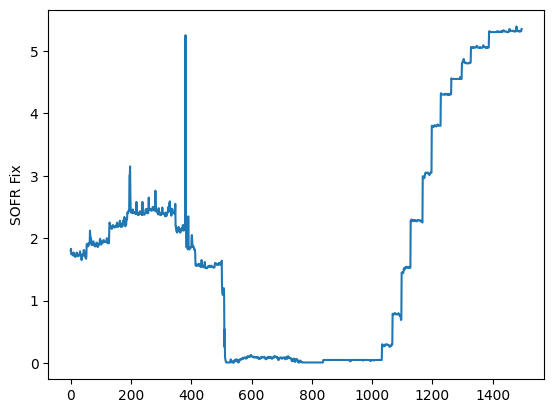

In [ ]:
sns.lineplot(df_train['SOFR Fix'])

In [ ]:
p=PowerTransformer(method='yeo-johnson')
cols_to_transform = ['SOFR Volume', 'RRP Amt', 'TGA Balance']

df_train[cols_to_transform] = p.fit_transform(df_train[cols_to_transform])
df_test[cols_to_transform] = p.transform(df_test[cols_to_transform])
df_val[cols_to_transform] = p.transform(df_val[cols_to_transform])

/tmp/ipython-input-274-2120343100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[cols_to_transform] = p.fit_transform(df_train[cols_to_transform])
/tmp/ipython-input-274-2120343100.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[cols_to_transform] = p.transform(df_test[cols_to_transform])
/tmp/ipython-input-274-2120343100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [ ]:
df_val.head()

,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,DFF,day,year,month,month_sin,month_cos,dow,dow_sin,dow_cos,weekofyear,quarter,month_end_flag,quarter_end_flag,year_end_flag
1497,5.39,2.127588,5.486,0.835560,0.504004,5.33,27,2023,12,-2.449294e-16,1.000000,2,0.974928,-0.222521,52,4,0,0,0
1498,5.40,2.260466,5.495,0.839615,0.527674,5.33,28,2023,12,-2.449294e-16,1.000000,3,0.433884,-0.900969,52,4,0,0,0
1499,5.38,2.100842,5.434,0.903679,0.611499,5.33,29,2023,12,-2.449294e-16,1.000000,4,-0.433884,-0.900969,52,4,0,0,0
1500,5.38,2.100842,5.434,0.903679,0.611499,5.33,1,2024,1,5.000000e-01,0.866025,0,0.000000,1.000000,1,1,0,0,0
1501,5.40,2.378576,5.504,0.788764,0.607280,5.33,1,2024,2,8.660254e-01,0.500000,3,0.433884,-0.900969,5,1,0,0,0


In [ ]:
m=MinMaxScaler()
s=StandardScaler()

df_train_m=m.fit_transform(df_train)
df_test_m=m.transform(df_test)
df_val_m=m.transform(df_val)

df_train_s=s.fit_transform(df_train)
df_test_s=s.transform(df_test)
df_val_s=s.transform(df_val)

In [ ]:
df_train_m_df = pd.DataFrame(df_train_m, columns=df_train.columns)
df_test_m_df = pd.DataFrame(df_test_m, columns=df_test.columns)
df_val_m_df = pd.DataFrame(df_val_m, columns=df_val.columns)

df_train_s_df = pd.DataFrame(df_train_s, columns=df_train.columns)
df_test_s_df = pd.DataFrame(df_test_s, columns=df_test.columns)
df_val_s_df = pd.DataFrame(df_val_s, columns=df_val.columns)

In [ ]:
display(df_train_m_df)

,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,DFF,day,year,month,month_sin,month_cos,dow,dow_sin,dow_cos,weekofyear,quarter,month_end_flag,quarter_end_flag,year_end_flag
0,0.332714,0.348527,0.325520,0.199979,0.546587,0.310019,0.100000,0.0,0.090909,0.933013,0.750000,1.000000,0.099031,8.019377e-01,0.076923,0.000000,0.0,0.0,0.0
1,0.338290,0.303170,0.322195,0.288813,0.527876,0.311909,0.100000,0.0,0.181818,1.000000,0.500000,1.000000,0.099031,8.019377e-01,0.153846,0.000000,0.0,0.0,0.0
2,0.321561,0.366397,0.299751,0.218296,0.528587,0.311909,0.100000,0.0,0.272727,0.933013,0.250000,0.333333,1.000000,3.568959e-01,0.250000,0.333333,0.0,0.0,0.0
3,0.323420,0.310982,0.305569,0.219997,0.522267,0.311909,0.100000,0.0,0.363636,0.750000,0.066987,0.666667,0.277479,0.000000e+00,0.326923,0.333333,0.0,0.0,0.0
4,0.323420,0.341215,0.303741,0.225510,0.521433,0.311909,0.100000,0.0,0.454545,0.500000,0.000000,0.000000,0.500000,1.000000e+00,0.423077,0.333333,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,0.985130,0.958665,0.890773,0.848355,0.749796,1.000000,0.633333,1.0,1.000000,0.500000,1.000000,0.333333,1.000000,3.568959e-01,0.961538,1.000000,0.0,0.0,0.0
1493,0.985130,0.969822,0.892768,0.848233,0.750307,1.000000,0.666667,1.0,1.000000,0.500000,1.000000,0.500000,0.722521,5.551115e-17,0.961538,1.000000,0.0,0.0,0.0
1494,0.986989,0.955613,0.898254,0.847222,0.749651,1.000000,0.700000,1.0,1.000000,0.500000,1.000000,0.666667,0.277479,0.000000e+00,0.961538,1.000000,0.0,0.0,0.0
1495,0.986989,0.955613,0.898254,0.847222,0.749651,1.000000,0.800000,1.0,1.000000,0.500000,1.000000,0.000000,0.500000,1.000000e+00,0.980769,1.000000,0.0,0.0,0.0


In [ ]:
df_train_m_df.columns

Index(['SOFR Fix', 'SOFR Volume', 'DTCC Tsy', 'RRP Amt', 'TGA Balance', 'DFF',
       'day', 'year', 'month', 'month_sin', 'month_cos', 'dow', 'dow_sin',
       'dow_cos', 'weekofyear', 'quarter', 'month_end_flag',
       'quarter_end_flag', 'year_end_flag'],
      dtype='object')

XG BOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import datetime

 Create New Dataset with Lag and Rolling Features

In [ ]:
# === CONFIGURATION ===
target_col = 'SOFR Fix'
lag_cols = ['SOFR Fix', 'DFF', 'SOFR Volume']
lags = [1, 2, 3, 7, 14, 30]
rolling_windows = [7, 30]

In [ ]:
def add_lag_features(df, cols, lags):
    df_copy = df.copy()
    for col in cols:
        for lag in lags:
            df_copy[f'{col}_lag_{lag}'] = df_copy[col].shift(lag)
    return df_copy

In [ ]:
def add_rolling_features(df, col, windows):
    df_copy = df.copy()
    for window in windows:
        df_copy[f'{col}_rolling_mean_{window}'] = df_copy[col].rolling(window).mean()
        df_copy[f'{col}_rolling_std_{window}'] = df_copy[col].rolling(window).std()
    return df_copy

In [ ]:
def process(df):
    df_proc = add_lag_features(df, lag_cols, lags)
    df_proc = add_rolling_features(df_proc, target_col, rolling_windows)
    return df_proc.dropna()

In [ ]:
train_df = process(df_train_m_df)
val_df   = process(df_val_m_df)
test_df  = process(df_test_m_df)


In [ ]:
def get_X_y(df):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return X, y

In [ ]:
X_train, y_train = get_X_y(train_df)
X_val, y_val     = get_X_y(val_df)
X_test, y_test   = get_X_y(test_df)

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val, label=y_val)
dtest  = xgb.DMatrix(X_test)

In [ ]:
# === STEP 4: Train Model ===
params = {
    'objective': 'reg:squarederror',
    'max_depth': 10,
    'eta': 0.03,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse',
    'seed': 42
}

In [ ]:
evals = [(dtrain, 'train'), (dval, 'eval')]

In [ ]:
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=3000,
    evals=evals,
    early_stopping_rounds=30,
    verbose_eval=True
)

[0]	train-rmse:0.32344	eval-rmse:0.62342
[1]	train-rmse:0.31384	eval-rmse:0.60566
[2]	train-rmse:0.30453	eval-rmse:0.58867
[3]	train-rmse:0.29551	eval-rmse:0.57206
[4]	train-rmse:0.28675	eval-rmse:0.55610
[5]	train-rmse:0.27824	eval-rmse:0.54049
[6]	train-rmse:0.26999	eval-rmse:0.52549
[7]	train-rmse:0.26198	eval-rmse:0.51041
[8]	train-rmse:0.25422	eval-rmse:0.49616
[9]	train-rmse:0.24668	eval-rmse:0.48199
[10]	train-rmse:0.23939	eval-rmse:0.46846
[11]	train-rmse:0.23229	eval-rmse:0.45532
[12]	train-rmse:0.22540	eval-rmse:0.44272
[13]	train-rmse:0.21871	eval-rmse:0.43048
[14]	train-rmse:0.21223	eval-rmse:0.41867
[15]	train-rmse:0.20596	eval-rmse:0.40639
[16]	train-rmse:0.19986	eval-rmse:0.39501
[17]	train-rmse:0.19397	eval-rmse:0.38410
[18]	train-rmse:0.18823	eval-rmse:0.37333
[19]	train-rmse:0.18267	eval-rmse:0.36248
[20]	train-rmse:0.17727	eval-rmse:0.35214
[21]	train-rmse:0.17203	eval-rmse:0.34210
[22]	train-rmse:0.16694	eval-rmse:0.33247
[23]	train-rmse:0.16199	eval-rmse:0.32285
[2

In [ ]:
y_val_pred = model.predict(dval)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {val_rmse:.4f}")

Validation RMSE: 0.0117


In [ ]:
val_mean = y_val.mean()
val_accuracy = (1 - val_rmse / val_mean) * 100
print(f"Validation Accuracy: {val_accuracy:.2f}%")

Validation Accuracy: 98.81%


In [ ]:
y_test_pred = model.predict(dtest)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {test_rmse:.4f}")

Test RMSE: 0.0136


In [ ]:
test_mean = y_test.mean()
test_accuracy = (1 - test_rmse / test_mean) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 98.33%


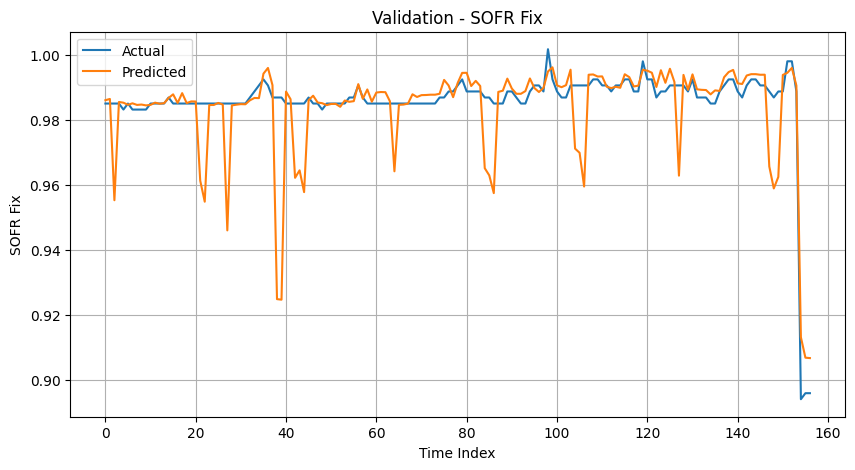

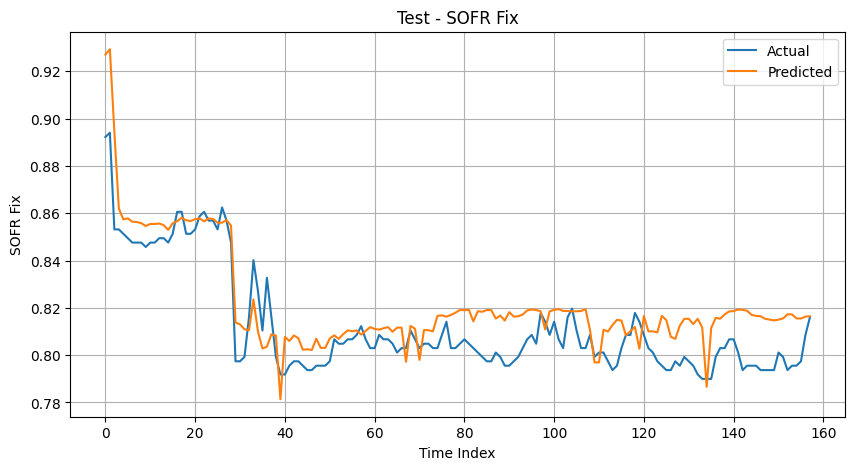

In [ ]:
def plot_predictions(actual, predicted, title):
    plt.figure(figsize=(10, 5))
    plt.plot(actual.values, label="Actual")
    plt.plot(predicted, label="Predicted")
    plt.title(title)
    plt.xlabel("Time Index")
    plt.ylabel("SOFR Fix")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions(y_val, y_val_pred, "Validation - SOFR Fix")
plot_predictions(y_test, y_test_pred, "Test - SOFR Fix")

In [ ]:
feature_cols = df_train.columns.tolist()

# 🧠 Get the index of 'SOFR Fix'
sofr_fix_index = feature_cols.index('SOFR Fix')

# 🎯 Create dummy 2D array with only SOFR Fix values
# If you want just the last prediction:
last_scaled = np.array([[y_test_pred[-1]]])

# Trick: We need to inverse-transform the entire row, so we fake other values
# Let's create a dummy row with zeros
dummy_row = np.zeros((1, len(feature_cols)))
dummy_row[0, sofr_fix_index] = y_test_pred[-1]

# 🔁 Inverse-transform full row
full_inverse = m.inverse_transform(dummy_row)

# ✅ Extract descaled SOFR Fix
sofr_fix_descaled = full_inverse[0, sofr_fix_index]

# 🔍 Print it
print(f"🔢 Scaled SOFR Fix prediction: {y_test_pred[-1]:.4f}")
print(f"💰 Descaled SOFR Fix prediction: {sofr_fix_descaled:.4f}")

🔢 Scaled SOFR Fix prediction: 0.8164
💰 Descaled SOFR Fix prediction: 4.4024


TRANSFORMERS